<a href="https://colab.research.google.com/github/sukkyun2/big-data-visualization-and-analysis/blob/main/04.Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework for Lecture 7 - Seaborn

## Study at least two more by yourself and apply it to the dataset

### Netflix Movies and TV Shows

About this Dataset: Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Reference : https://www.kaggle.com/datasets/shivamb/netflix-shows

In [ ]:
import kagglehub

# 데이터셋 다운로드
path = kagglehub.dataset_download("shivamb/netflix-shows")
path

100%|██████████| 1.34M/1.34M [00:00<00:00, 17.5MB/s]

Extracting files...


'/root/.cache/kagglehub/datasets/shivamb/netflix-shows/versions/5'

In [ ]:
import pandas as pd
import os

df = pd.read_csv(os.path.join(path, "netflix_titles.csv"))
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# 데이터셋 상세정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Apply basic charts

Using Bar Chart

### Preprocessing

- `country` column contains country names in a comma-separated format, such as "United States, Australia". Therefore, we need to go through a preprocessing step to split and clean the data.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'country'를 쉼표로 분리하여 국가 리스트로 만듬
# df['country'] = df['country'].apply(lambda x: x.split(','))

df_exploded = df.explode('country')

### Top 30 Countries with the Most Content

#### **X-axis : Country Names**
The X-axis represents the countries.
- Each bar on the plot corresponds to a specific country, visualizing the number of contents available in that country.
- The countries shown on the X-axis are filtered to show only the `top 30` countries with the most content.
- The X-axis labels are rotated by 90 degrees (using plt.xticks(rotation=90)) to ensure that long country names are displayed clearly and are more readable.

#### **Y-axis : Content Count**
The Y-axis represents the number of contents available in each country.
- The Y-axis values show how many contents are available for each country, which is calculated by value_counts() on the country column.
- The height of each bar corresponds to the number of contents in that country. The higher the bar, the more contents are available in that country.

#### **Result**
the United States and India have the most content available compared to other countries

<ipython-input-6-323305863feb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='country', data=df_exploded[df_exploded['country'].isin(top_30_countries.index)], palette="husl")


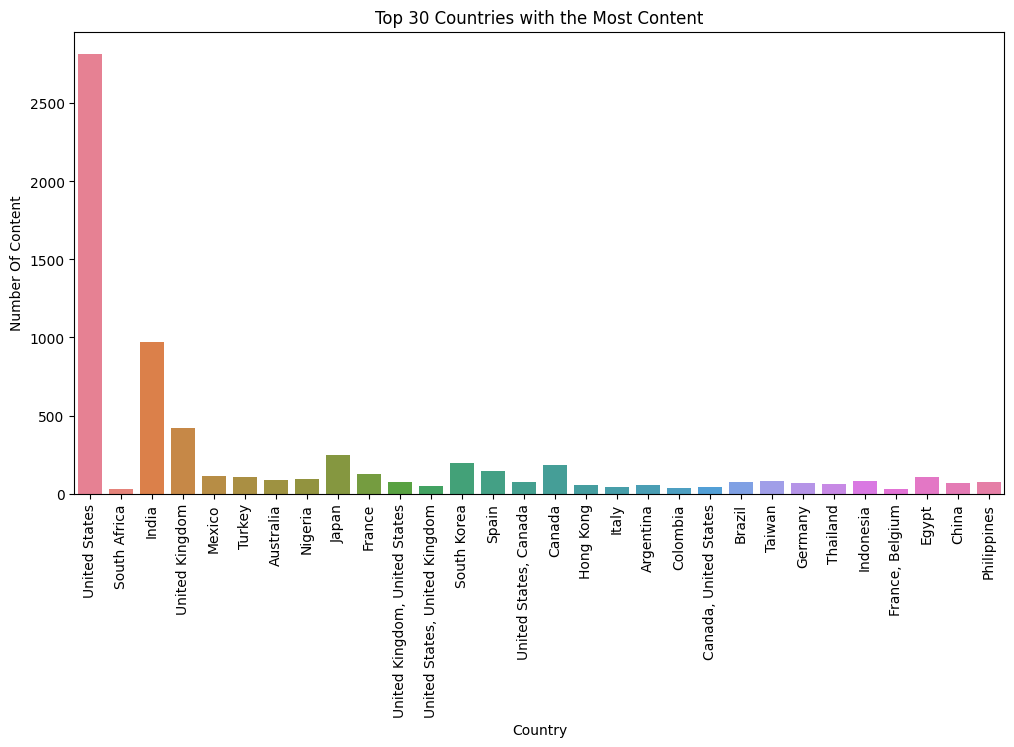

In [ ]:
# 국가별 콘텐츠 수 계산
country_counts = df_exploded['country'].value_counts()

# 상위 50개 국가만 선택
top_30_countries = country_counts.head(30)

# 상위 30개 국가에 대한 콘텐츠 수를 시각화
plt.figure(figsize=(12,6))
sns.countplot(x='country', data=df_exploded[df_exploded['country'].isin(top_30_countries.index)], palette="husl")
plt.title('Top 30 Countries with the Most Content')
plt.xlabel('Country')
plt.ylabel('Number Of Content')
plt.xticks(rotation=90)
plt.show()

## Apply statistical charts

Using violin plots

### Distribution of Release Years by Content Type

#### **X-axis : Type**
Identifier - A Movie or TV Show

#### **Y-axis : Release Years**
Actual Release year of the move / show

#### **Result**
- The width of the violins represents the density of the data, and for both types, the width is widest around the year 2020.
- The Movie type has content starting from the 1980s, with a gradual increase over time, becoming more prominent in recent years.
- The TV Show type had little to no content before the 2000s, but it saw a rapid increase in the number of releases starting from the 2000s.


<ipython-input-8-8d25ffee6265>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type', y='release_year', data=df, palette="husl")


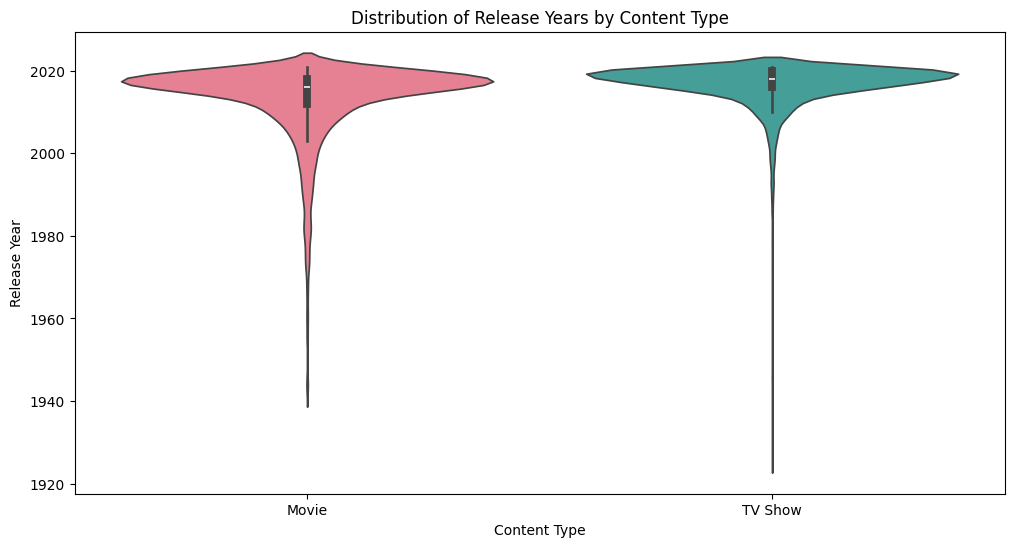

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='type', y='release_year', data=df, palette="husl")

plt.title('Distribution of Release Years by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Release Year')

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!apt-get update
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [ ]:
!jupyter nbconvert --to PDF '/content/drive/MyDrive/Colab Notebooks/bigdata-report4'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/bigdata-report4.ipynb to PDF
[NbConvertApp] Support files will be in bigdata-report4_files/
[NbConvertApp] Making directory ./bigdata-report4_files
[NbConvertApp] Writing 64263 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 153177 bytes to /content/drive/MyDrive/Colab Notebooks/bigdata-report4.pdf
